In [1]:
import numpy as np
import pandas as pd
import Thermobar as pt
import matplotlib.pyplot as plt

In [2]:
out=pt.import_excel('Medard_2022_Al_Plag.xlsx', sheet_name='Thermobar2', suffix='_Amp')
myAmps1=out['Amps']
Amp_input=out['my_input']

## Using Leake parameterization


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Text(0, 0.5, 'Calc P')

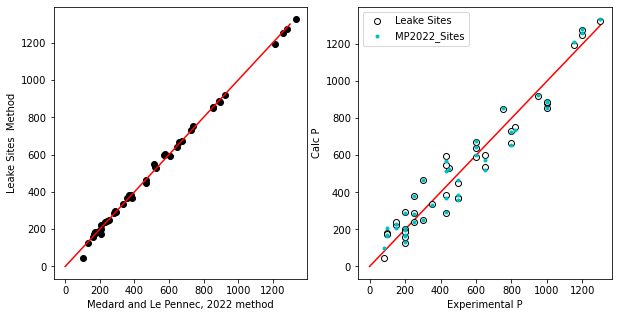

In [3]:
Leake=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP='P_Medard2022_LeakeSites')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Amp_input['Médard and Le Pennec, this study'], Leake*100, 'ok')
ax1.set_xlabel('Medard and Le Pennec, 2022 method')
ax1.set_ylabel('Leake Sites  Method')
ax1.plot([0, 1300], [0, 1300], '-r')
ax2.plot([0, 1300], [0, 1300], '-r')
ax2.plot(Amp_input['Pressure (MPa)'], Leake*100, 'ok', mfc='white', label='Leake Sites')
ax2.plot(Amp_input['Pressure (MPa)'], Amp_input['Médard and Le Pennec, this study'],
         '.c', label='MP2022_Sites')
ax2.set_xlabel('Experimental P')
ax2.legend()
ax2.set_ylabel('Calc P')

## Ridolfi Sites

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Text(0, 0.5, 'Calc P')

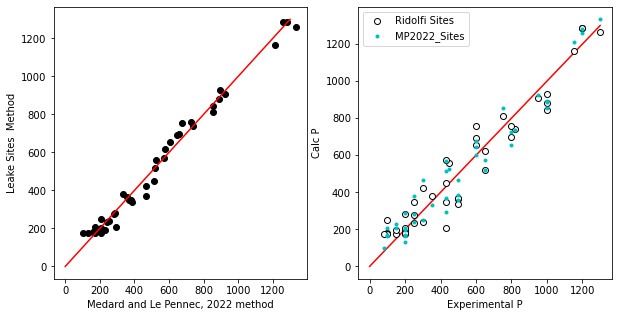

In [4]:
Ridolfi=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP='P_Medard2022_RidolfiSites')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Amp_input['Médard and Le Pennec, this study'], Ridolfi*100, 'ok')
ax1.set_xlabel('Medard and Le Pennec, 2022 method')
ax1.set_ylabel('Leake Sites  Method')
ax1.plot([0, 1300], [0, 1300], '-r')
ax2.plot([0, 1300], [0, 1300], '-r')
ax2.plot(Amp_input['Pressure (MPa)'], Ridolfi*100, 'ok', mfc='white', label='Ridolfi Sites')
ax2.plot(Amp_input['Pressure (MPa)'], Amp_input['Médard and Le Pennec, this study'],
         '.c', label='MP2022_Sites')
ax2.set_xlabel('Experimental P')
ax2.legend()
ax2.set_ylabel('Calc P')

## Mutch Sites

Text(0, 0.5, 'Calc P')

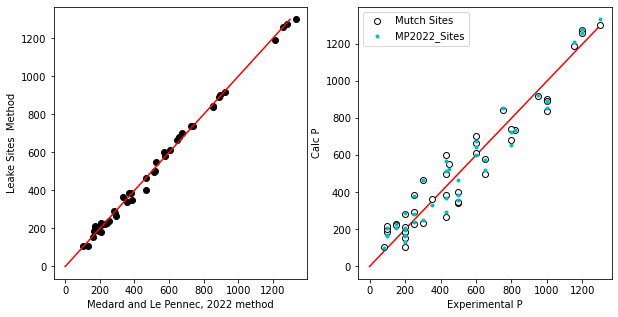

In [5]:
Mutch=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP='P_Medard2022_MutchSites')


fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(Amp_input['Médard and Le Pennec, this study'], Mutch*100, 'ok')
ax1.set_xlabel('Medard and Le Pennec, 2022 method')
ax1.set_ylabel('Leake Sites  Method')
ax1.plot([0, 1300], [0, 1300], '-r')
ax2.plot([0, 1300], [0, 1300], '-r')
ax2.plot(Amp_input['Pressure (MPa)'], Mutch*100, 'ok', mfc='white', label='Mutch Sites')
ax2.plot(Amp_input['Pressure (MPa)'], Amp_input['Médard and Le Pennec, this study'],
         '.c', label='MP2022_Sites')
ax2.set_xlabel('Experimental P')
ax2.legend()
ax2.set_ylabel('Calc P')

## Example monte Carlo simulation
- Loading in experimental imprecision from Kraw et al. 2012

In [17]:
KrawErr=pd.read_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_3.xlsx',
                   sheet_name='Kraw13_042907_Analyses')
KrawAmp_in=pt.import_excel(r'G:\My Drive\Postdoc\PyMME\MyBarometers\LEPR_Tests\Tidy_Tukey_Exp_Av\Clinopyroxene_Assesment\paper1_NoisePropagation\Submit_July18th_2022\Supporting_Info\Supporting_Data_2.xlsx',
                   sheet_name='41c_103a', suffix='_Amp')
KrawAmp=KrawAmp_in['Amps']


In [21]:
KrawErr_Amp=KrawErr.loc[KrawErr['Name']=="41c-103a amph3"]


In [15]:
Kraw_06_41c_amp=KrawAmp
Kraw_Amp_Av=Kraw_06_41c_amp.mean(axis=0).to_frame().T
Kraw_Amp_Av

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,47.885556,0.973144,10.148889,7.548889,0.118822,17.766667,11.15,2.152678,0.217578,0.207622,0.0,0.0,4.0


In [23]:
B1038_AmpAv_noise1

NameError: name 'B1038_AmpAv_noise1' is not defined

In [22]:


B1038_Amp_Err1=pd.DataFrame(data={'SiO2_Cpx_Err': KrawErr_Amp.loc[KrawErr_Amp['Element']=="SiO2", 'Error_Per'].values,
                            'TiO2_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="TiO2", 'Error_Per'].values,
                             'Al2O3_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="Al2O3", 'Error_Per'].values,
                             'FeOt_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="FeO", 'Error_Per'].values,
                            'MnO_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="MnO", 'Error_Per'].values,
                            'MgO_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="MgO", 'Error_Per'].values,
                            'CaO_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="CaO", 'Error_Per'].values,
                            'Na2O_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="Na2O", 'Error_Per'].values,
                            'Cr2O3_Cpx_Err':KrawErr_Amp.loc[KrawErr_Amp['Element']=="Cr2O3", 'Error_Per'].values,
                               'K2O_Cpx_Err': 0}, index=[0])
B1038_AmpAv_noise1=pt.add_noise_sample_1phase(phase_comp=KrawErr_Amp, phase_err=B1038_Amp_Err1,
                                             phase_err_type="Perc", duplicates=500, err_dist="normal",
                                            positive=False)


Amp_B1038_Calc_Syn=pt.calculate_amp_only_press(amp_comps=B1038_AmpAv_noise1, 
                                               equationP='P_Medard2022_MutchSites')


UnboundLocalError: local variable 'elx' referenced before assignment

In [37]:
myAmps1.head()

,SiO2_Amp,TiO2_Amp,Al2O3_Amp,FeOt_Amp,MnO_Amp,MgO_Amp,CaO_Amp,Na2O_Amp,K2O_Amp,Cr2O3_Amp,F_Amp,Cl_Amp,Sample_ID_Amp
0,46.51,1.32,7.37,14.399476,0.70,14.54,11.64,1.56,0.79,0.0,0.0,0.0,0
1,46.88,1.24,7.38,13.893670,0.74,14.24,11.56,1.29,0.82,0.0,0.0,0.0,1
2,47.19,1.33,7.54,14.357809,0.68,14.27,11.46,1.56,0.81,0.0,0.0,0.0,2
3,45.95,1.42,7.52,14.039719,0.68,13.95,11.68,1.57,0.94,0.0,0.0,0.0,3
4,45.42,1.43,8.50,16.187772,0.72,12.49,11.30,1.47,1.07,0.0,0.0,0.0,4


C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


Text(0.5, 1.0, 'Using Ridolfi Sites')

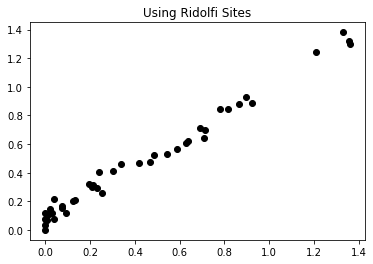

In [38]:
sites_R=pt.calculate_sites_ridolfi(amp_comps=myAmps1)
plt.plot(sites_R['Al_VI_C'], Amp_input['Al_C'], 'ok')
plt.title('Using Ridolfi Sites')

In [47]:
reg=pt.calculate_R2(sites_R['Al_VI_C'], Amp_input['Pressure (MPa)'], xy=False)
print(reg['Grad'])
print(reg['Int'])
P_Calc_PW3=reg['Grad']*sites_R['Al_VI_C']+reg['Int']


[817.22283194]
[176.24032229]


In [46]:
StatsR=pt.calculate_R2(Amp_input['Pressure (MPa)'], P_Calc_PW3, xy=False)
StatsR

{'R2': '0.93',
 'RMSE': '93.38',
 'RMSE_num': 93.38,
 'P_val': '0.000',
 'Median': '6.51',
 'Mean': '0.00',
 'Int': array([37.77088502]),
 'Grad': array([0.92723351])}

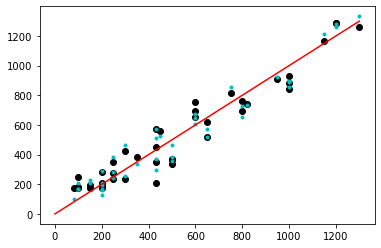

In [42]:
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_PW3, 'ok')


plt.plot([0, 1300], [0, 1300], '-r')

## Using Mutch Sites

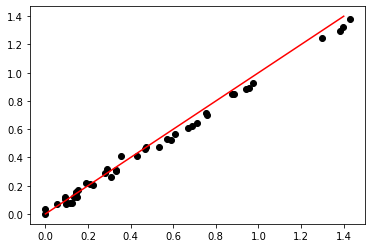

In [48]:
amp_comps_noHalogens=myAmps1

ox23 = pt.calculate_23oxygens_amphibole(amp_comps_noHalogens)
Amp_sites_initial = pt.get_amp_sites_mutch(ox23)
norm_cat = pt.amp_components_ferric_ferrous_mutch(Amp_sites_initial, ox23)
Sites_M = pt.get_amp_sites_ferric_ferrous_mutch(norm_cat)

plt.plot(Sites_M['Al_C'], Amp_input['Al_C'], 'ok')
plt.plot([0, 1.4], [0, 1.4], '-r')

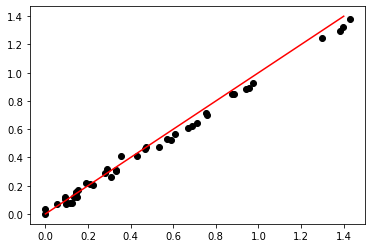

In [61]:
norm_cat['Fet']=norm_cat['Fe2O3_Amp_cat_23ox']+norm_cat['FeO_Amp_cat_23ox']
norm_cat2=norm_cat.copy()
norm_cat2['FeO_Amp_cat_23ox']=norm_cat['Fet']*0.8
norm_cat2['Fe2O3_Amp_cat_23ox']=norm_cat['Fet']*0.2
Sites_M2 = pt.get_amp_sites_ferric_ferrous_mutch(norm_cat2)

plt.plot(Sites_M2['Al_C'], Amp_input['Al_C'], 'ok')
plt.plot([0, 1.4], [0, 1.4], '-r')

In [62]:
amp_comps
ox23_2 = pt.calculate_23oxygens_amphibole(amp_comps_FeAdjust)
Amp_sites_initial_2 = pt.get_amp_sites_mutch(ox23_2)

plt.plot(Amp_sites_initial_2['Al_C'], Amp_input['Al_C'], 'ok')
plt.plot([0, 1.4], [0, 1.4], '-r')

NameError: name 'amp_comps' is not defined

In [6]:
# P_Calc_PW=892*Sites_M['Al_C']+101
# P_Calc_M=892*Amp_input['Al_C']+101

In [63]:
reg=pt.calculate_R2(Sites_M['Al_C'], Amp_input['Pressure (MPa)'])
print(reg['Grad'])
print(reg['Int'])
P_Calc_PW2=reg['Grad']*Sites_M['Al_C']+reg['Int']

[835.07125833]
[107.37542222]


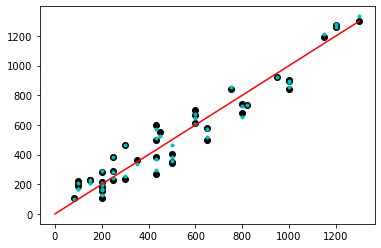

In [64]:
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_PW2, 'ok')
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_M, '.c')

plt.plot([0, 1300], [0, 1300], '-r')

In [65]:
pt.calculate_R2(Amp_input['Pressure (MPa)'], P_Calc_PW2, xy=False)

{'R2': '0.93',
 'RMSE': '93.90',
 'RMSE_num': 93.9,
 'P_val': '0.000',
 'Median': '12.16',
 'Mean': '-0.00',
 'Int': array([38.19339696]),
 'Grad': array([0.92641953])}

In [18]:
pt.calculate_R2(Amp_input['Pressure (MPa)'], P_Calc_M, xy=False)

{'R2': '0.94',
 'RMSE': '85.75',
 'RMSE_num': 85.75,
 'P_val': '0.000',
 'Median': '3.40',
 'Mean': '-0.02',
 'Int': array([31.84270971]),
 'Grad': array([0.93861924])}

## Calculating Mutch using their comps

In [8]:
Amp_Mutch_PW=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Mutch2016")

In [9]:
rid_Mutch_PW=pt.calculate_amp_only_press(amp_comps=myAmps1, equationP="P_Mutch2016")

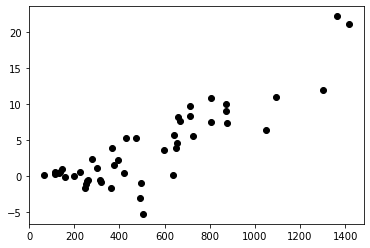

In [10]:
plt.plot(Amp_Mutch_PW['P_kbar_calc']*100, 
         Amp_Mutch_PW['P_kbar_calc']*100-Amp_input['Mutch et al. 2016'], 'ok')

In [18]:
myAmps2=myAmps1.copy()
myAmps2['FeOt_Amp']=myAmps1['FeOt_Amp']*(1*0.8+1.5*0.2)

ox=pt.calculate_oxygens_amphibole(amp_comps=myAmps1)
ox.head()

ox23=pt.calculate_23oxygens_amphibole(amp_comps=myAmps1)

In [19]:
ox23

,Si_Amp_cat_23ox,Mg_Amp_cat_23ox,Fet_Amp_cat_23ox,Ca_Amp_cat_23ox,Al_Amp_cat_23ox,Na_Amp_cat_23ox,K_Amp_cat_23ox,Mn_Amp_cat_23ox,Ti_Amp_cat_23ox,Cr_Amp_cat_23ox,oxy_renorm_factor,cation_sum_Si_Mg,cation_sum_Si_Ca,cation_sum_All,Mgno_Amp
0,6.820797,3.178789,1.766003,1.829005,1.273835,0.443568,0.147800,0.086950,0.145610,0.000000,0.0,13.271986,15.100991,15.692359,0.642856
1,6.898254,3.123706,1.709718,1.822563,1.279867,0.368034,0.153930,0.092229,0.137247,0.000000,0.0,13.241021,15.063584,15.585548,0.646272
2,6.874880,3.099186,1.749280,1.788846,1.294623,0.440643,0.150542,0.083909,0.145746,0.000000,0.0,13.247624,15.036470,15.627655,0.639210
3,6.814867,3.084286,1.741351,1.856042,1.314458,0.451459,0.177852,0.085421,0.158413,0.000000,0.0,13.198794,15.054836,15.684148,0.639146
4,6.739733,2.762909,2.008809,1.796582,1.486522,0.422922,0.202553,0.090493,0.159610,0.000000,0.0,13.248076,15.044658,15.670133,0.579018
5,6.743507,2.918465,1.862925,1.781551,1.492754,0.428910,0.193676,0.082052,0.158785,0.000000,0.0,13.258487,15.040038,15.662624,0.610380
6,6.396386,2.347746,2.239665,1.853573,1.973855,0.474209,0.258747,0.093475,0.172754,0.000000,0.0,13.223881,15.077454,15.810410,0.511780
7,6.405918,3.258573,1.432085,1.767955,1.965528,0.593612,0.199048,0.046130,0.169400,0.000000,0.0,13.277633,15.045588,15.838248,0.694694
8,6.461627,3.843632,0.877989,1.746300,2.002558,0.512212,0.119708,0.050133,0.119447,0.000000,0.0,13.355387,15.101687,15.733607,0.814049
9,6.271502,1.963001,2.472599,1.856063,2.290005,0.440481,0.299360,0.086086,0.137159,0.000000,0.0,13.220353,15.076415,15.816256,0.442556


In [17]:
ox['FeO_Med']=ox['FeOt_Amp_ox']*(1*0.8+1.5*0.2)
ox['FeO_Med']

0     0.220462
1     0.212718
2     0.219824
3     0.214954
4     0.247842
5     0.235885
6     0.274939
7     0.178118
8     0.111345
9     0.302865
10    0.338723
11    0.307953
12    0.000000
13    0.251565
14    0.222676
15    0.239716
16    0.232903
17    0.230683
18    0.263568
19    0.247417
20    0.248014
21    0.000000
22    0.236393
23    0.210978
24    0.277272
25    0.282784
26    0.256297
27    0.255072
28    0.261196
29    0.249560
30    0.000000
31    0.232412
32    0.262880
33    0.000000
34    0.267626
35    0.280334
36    0.293654
37    0.289827
38    0.271913
39    0.254613
40    0.269311
41    0.276200
42    0.297329
43    0.373269
44    0.351221
45    0.252469
46    0.240680
47    0.223379
48    0.263493
49    0.225676
50    0.116819
Name: FeO_Med, dtype: float64

In [ ]:
norm_cations = amp_apfu_df.copy()

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)


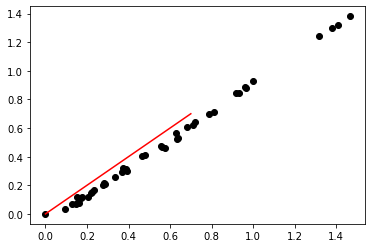

In [26]:
Leake=pt.get_amp_sites_leake(ox23)

plt.plot(Leake['Al_C'], Amp_input['Al_C'], 'ok')
plt.plot([0, 0.7], [0, 0.7], '-r')

In [66]:
reg=pt.calculate_R2(Leake['Al_C'], Amp_input['Pressure (MPa)'])
print(reg['Grad'])
print(reg['Int'])
P_Calc_PW3=reg['Grad']*Leake['Al_C']+reg['Int']

[874.64558583]
[43.72682101]


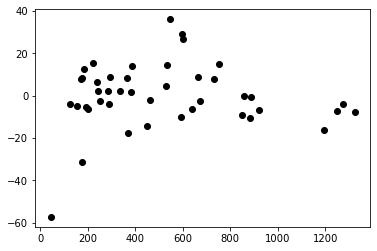

In [67]:
plt.plot(P_Calc_PW3, P_Calc_PW3-P_Calc_M, 'ok')

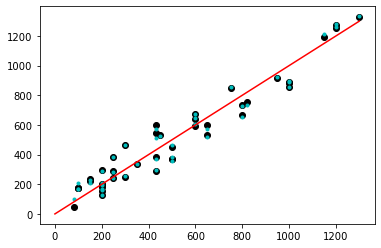

In [68]:
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_PW3, 'ok')
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_M, '.c')

plt.plot([0, 1300], [0, 1300], '-r')

In [69]:
pt.calculate_R2(Amp_input['Pressure (MPa)'], P_Calc_PW3, xy=False)

{'R2': '0.94',
 'RMSE': '86.59',
 'RMSE_num': 86.59,
 'P_val': '0.000',
 'Median': '-8.02',
 'Mean': '0.00',
 'Int': array([32.47662887]),
 'Grad': array([0.93743302])}

In [38]:
CalcZhang.columns

Index(['Si_Amp_cat_23ox', 'Mg_Amp_cat_23ox', 'Fet_Amp_cat_23ox',
       'Ca_Amp_cat_23ox', 'Al_Amp_cat_23ox', 'Na_Amp_cat_23ox',
       'K_Amp_cat_23ox', 'Mn_Amp_cat_23ox', 'Ti_Amp_cat_23ox',
       'Cr_Amp_cat_23ox', 'oxy_renorm_factor', 'cation_sum_Si_Mg',
       'cation_sum_Si_Ca', 'cation_sum_All', 'Mgno_Amp', 'Si_T', 'Al_T',
       'Al_C', 'Ti_C', 'Mg_C', 'Fe_C', 'Mn_C', 'Cr_C', 'Mg_B', 'Fe_B', 'Mn_B',
       'Na_B', 'Ca_B', 'Na_A', 'K_A', 'Ca_A', 'Sum_T', 'Sum_C', 'Sum_B',
       'Sum_A', 'factor_8SiAl', 'factor_15eK', 'factor_13eCNK', 'All ferric',
       '8Si_Min', '16CAT_Min', '15eNK_Min', 'Min_MinFactor', 'Min_factor',
       'Max_factor', 'Av_factor', 'Si_T_ideal', 'Al_IV_T_ideal', 'Ti_T_ideal',
       'Al_VI_C_ideal', 'Ti_C_ideal', 'Cr_C_ideal', 'Fe3_C_ideal',
       'Mg_C_ideal', 'Fe2_C_ideal', 'Mn_C_ideal', 'Mg_B_ideal', 'Fe2_B_ideal',
       'Mn_B_ideal', 'Ca_B_ideal', 'Na_B_ideal', 'Na_A_ideal', 'K_A_ideal'],
      dtype='object')

C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users\penny\anaconda3\lib\site-packages\pandas\core\indexing.py:2115: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  new_ix = Index(new_ix)
C:\Users

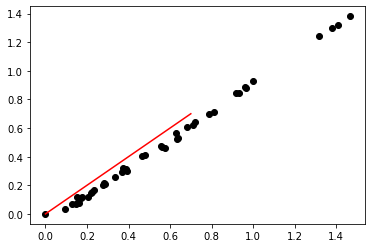

In [31]:
CalcZhang=pt.get_amp_sites_avferric_zhang(amp_comps=myAmps1)

plt.plot(CalcZhang['Al_C'], Amp_input['Al_C'], 'ok')
plt.plot([0, 0.7], [0, 0.7], '-r')

In [32]:
reg=pt.calculate_R2(CalcZhang['Al_C'], Amp_input['Pressure (MPa)'])
print(reg['Grad'])
print(reg['Int'])
P_Calc_PW4=reg['Grad']*CalcZhang['Al_C']+reg['Int']

[874.64558583]
[43.72682101]


{'R2': '0.94',
 'RMSE': '86.59',
 'RMSE_num': 86.59,
 'P_val': '0.000',
 'Median': '-8.02',
 'Mean': '0.00',
 'Int': array([32.47662887]),
 'Grad': array([0.93743302])}

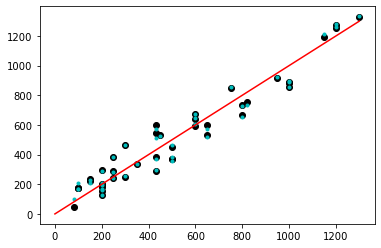

In [34]:
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_PW4, 'ok')
plt.plot(Amp_input['Pressure (MPa)'], P_Calc_M, '.c')

plt.plot([0, 1300], [0, 1300], '-r')

pt.calculate_R2(Amp_input['Pressure (MPa)'], P_Calc_PW4, xy=False)

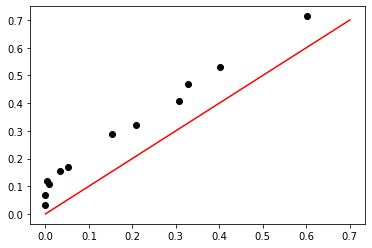

In [24]:
amp_comps_noHalogens=myAmps2

ox23 = pt.calculate_23oxygens_amphibole(amp_comps_noHalogens)
Amp_sites_initial = pt.get_amp_sites_mutch(ox23)
norm_cat = pt.amp_components_ferric_ferrous_mutch(Amp_sites_initial, ox23)
Sites_M2 = pt.get_amp_sites_ferric_ferrous_mutch(norm_cat)
plt.plot([0, 0.7], [0, 0.7], '-r')
plt.plot(Sites_M2['Al_C'], Amp_input['Al_C'], 'ok')